<h1> Creating a Phylogenetic Tree using Weighted Pair Group Method with Arithmetic Mean</h1>

This program will infer a phylogenetic tree usig WPGMA. WPGMA (Weighted Pair Group Method with Arithmetic Mean) is a simple method of creating phylogenies. It creates phylogenies by pairing off sequences (or sequence groups) based on similarity, until a single group remains.

WPGMA requires a few components:
* Multiple sequence aligment (provided)
* Phylip reader
* string distance function (hamming)
* initial distance matrix builder (applies distance function to aligned sequences)
* tree builder
* function to reduce the distance matrix
* function to find cell containing minimum distance
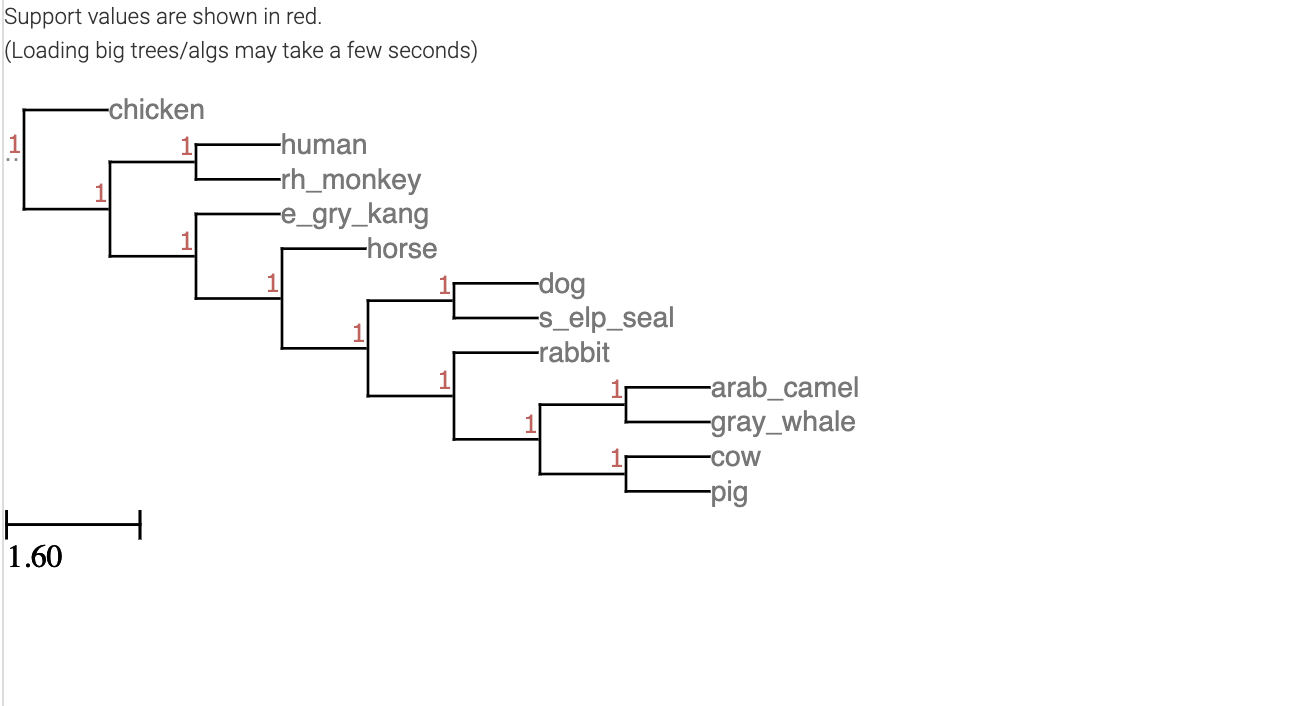

### Setup
Retrieve the Data File and import dependencies

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import os.path
# Load the genbank file
DATA_FILE_GITHUB = "https://raw.githubusercontent.com/vinaykbansal/data/main/cytochrome_c.phylip"
DEFAULT_FILE_NAME = 'cytochrome_c.phylip'

fileName = DEFAULT_FILE_NAME
#Does the file exists locally, if not get it from the github
if not os.path.exists(fileName):
  #Load the file from Github to the local folder
  !wget --no-check-certificate --content-disposition $DATA_FILE_GITHUB

print("Reading file:", fileName)

# Read in the string from the file
with open(fileName, "r") as myfile:
    file_input = myfile.read()

Reading file: cytochrome_c.phylip


###Step 1 Reading in the Data
###Creating a function to Load the PHYLIP Formated data and save the data to dictionary

Here we created a function to loading sequences from a file. In this case, the sequences will be stored in a file format common to phylogenetics, called PHYLIP. The information will be stored in a dictionary, with the sequence names as the keys.

###PHYLIP format:

name1_with_no_white_space SEQUENCE1_WITH_NO_WHITESPACE_AND_NO_TEXT_WRAP

name2_with_no_white_space SEQUENCE2_WITH_NO_WHITESPACE_AND_NO_TEXT_WRAP

name3_with_no_white_space SEQUENCE3_WITH_NO_WHITESPACE_AND_NO_TEXT_WRAP

###PHYLIP Example:

FISH ATAGATA

CAT ATCGAAT

DOG ATCGAAT

In [ ]:
"""
#Create function to load the file to a dictionary below
def LoadPhylip(filepath):
"""

#Function needed to load the file to a dictionary with names and sequences
def LoadPhylip(filepath):
    fh = open(filepath, "r")
    data = fh.readlines()
    fh.close()

    sequences = {}
    for line in data:
        header, sequence = line.split()
        sequences[header] = sequence
    return sequences

#Loading the sequence and printing it
sequences = LoadPhylip(DEFAULT_FILE_NAME)

print(sequences)

{'human': 'MGDVEKGKKIFIMKCSQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGYSYTAANKNKGIIWGEDTLMEYLENPKKYIPGTKMIFVGIKKKEERADLIAYLKKATNE', 'horse': 'MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGFTYTDANKNKGITWKEETLMEYLENPKKYIPGTKMIFAGIKKKTEREDLIAYLKKATNE', 'cow': 'MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGFSYTDANKNKGITWGEETLMEYLENPKKYIPGTKMIFAGIKKKGEREDLIAYLKKATNE', 'rh_monkey': 'MGDVEKGKKIFIMKCSQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGYSYTAANKNKGITWGEDTLMEYLENPKKYIPGTKMIFVGIKKKEERADLIAYLKKATNE', 'dog': 'MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGFSYTDANKNKGITWGEETLMEYLENPKKYIPGTKMIFAGIKKTGERADLIAYLKKATKE', 'chicken': 'MGDIEKGKKIFVQKCSQCHTVEKGGKHKTGPNLHGLFGRKTGQAEGFSYTDANKNKGITWGEDTLMEYLENPKKYIPGTKMIFAGIKKKSERVDLIAYLKDATSK', 'rabbit': 'MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAVGFSYTDANKNKGITWGEDTLMEYLENPKKYIPGTKMIFAGIKKKDERADLIAYLKKATNE', 'pig': 'MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPGFSYTDANKNKGITWGEETLMEYLENPKKYIPGTKMIFAGIKKKGEREDLIAYLKKATNE', 's_elp_seal': 'MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGR

### Step 2
# **Create Distance Function for comparing two strings**
Sequence similarity can be measured through myriad methods, but WPGMA classically uses a distance function to quantify sequence similarity. Because the sequences we are comparing have been aligned with MSA tool, a very simple string distance function like Hamming distance is suitable for your script.

Hamming distance is calculated by comparing each character in one sequence to the character at the corresponding index in another sequence. The distance is the number of times the loop identifies a mismatch.


**Creating a function that takes two sequences as inputs and computes the Hamming distance between them.**<br> <br>
Below, is a visual of Hammings Distance for A-B, A-C, B-C: <br>
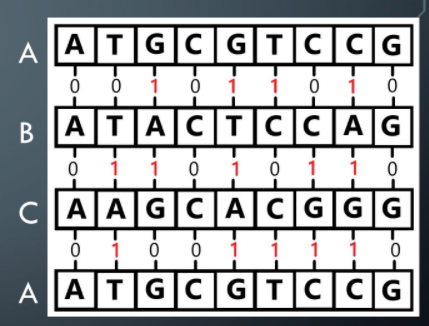

In [ ]:
"""
# Create function to find Hamming distance based on two equal length strings
def HammingDistance(x, y):
	#Ensuring that each sequence is of equal length, we have provided code for that purpose
	assert len(x) == len(y),
	#Creating a counter to keep track of the sum diferences
	#Creating the functions that finds the hamming distance between two strings
	return counter


# Find distance betweem 1st and 2nd sequence to test the outcome- Difference should be 12.0

"""

# Finding Hamming distance two strings of equal length

def HammingDistance(x, y): #~
	assert len(x) == len(y), 'sequences must be of equal length'
	counter = 0.0
	for i in range(len(x)):
		if (x[i] != y[i]):
			counter += 1
	return counter


# Finding and returning the distance betweem the 1st and 2nd sequence

distance = HammingDistance(sequences['human'], sequences['horse'])

print("Difference between human and  horse is", distance)

Difference between human and  horse is 12.0


### Step 3 Creating a DataFrame to store the sequence distances

We created a dataframe using pandas/numpy where the number of rows and columns is equal to the number of sequence in the dictionary we generated in step 1, i.e. len(dictionary).  The index and columns headers should contains sequence heading names, i.e. headers = sequence.keys()

We set the values in the table to 0 (np.zeros), as you will calculate distances in the next step.



In [ ]:
# initialize a dataframe with zero distances and headers
distanceArray = np.zeros((len(sequences), len(sequences)))
headers = sequences.keys()
distancedf = pd.DataFrame(distanceArray, columns=headers, index=headers)


display(distancedf)

,human,horse,cow,rh_monkey,dog,chicken,rabbit,pig,s_elp_seal,e_gry_kang,arab_camel,gray_whale
human,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
horse,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
cow,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rh_monkey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
dog,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
chicken,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
rabbit,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pig,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
s_elp_seal,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e_gry_kang,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Step 4

We populated the dataframe with the distances between sequences.

We used nested loops to compare every sequence to all other sequences in the dictionary.  Within the inner loop, we called the HammingDistance function that was created in step 2, capturing the return form that function as a variable.  We used the location function to store the variable in the dataframe based on the names of the two sequences compared.



In [ ]:
#call your distace function and add values to the table
for header1, sequence1 in sequences.items():
    for header2, sequence2 in sequences.items():
        distance = HammingDistance(sequence1, sequence2)
        distancedf.loc[header1, header2] = distance


display(distancedf)

,human,horse,cow,rh_monkey,dog,chicken,rabbit,pig,s_elp_seal,e_gry_kang,arab_camel,gray_whale
human,0.0,12.0,10.0,1.0,11.0,13.0,9.0,10.0,12.0,10.0,10.0,10.0
horse,12.0,0.0,3.0,11.0,6.0,11.0,6.0,3.0,7.0,7.0,5.0,5.0
cow,10.0,3.0,0.0,9.0,3.0,9.0,4.0,0.0,4.0,6.0,2.0,2.0
rh_monkey,1.0,11.0,9.0,0.0,10.0,12.0,8.0,9.0,11.0,11.0,9.0,9.0
dog,11.0,6.0,3.0,10.0,0.0,10.0,5.0,3.0,1.0,7.0,3.0,3.0
chicken,13.0,11.0,9.0,12.0,10.0,0.0,8.0,9.0,10.0,12.0,9.0,9.0
rabbit,9.0,6.0,4.0,8.0,5.0,8.0,0.0,4.0,6.0,6.0,2.0,2.0
pig,10.0,3.0,0.0,9.0,3.0,9.0,4.0,0.0,4.0,6.0,2.0,2.0
s_elp_seal,12.0,7.0,4.0,11.0,1.0,10.0,6.0,4.0,0.0,8.0,4.0,4.0
e_gry_kang,10.0,7.0,6.0,11.0,7.0,12.0,6.0,6.0,8.0,0.0,6.0,6.0


### Step 5

###Creating a function to find the minimum distance between two sequence in the matrix

This is where we start to build the WPGMA tree.  

We need to return only the two sequence headers and their actual Hamming distance for the index by column with the smallest value.

First, we created a variable to store the minimum value.  

Second, we needed to use nested loops to navigate your dataframe. Temporarily store the value at each position and use a conditional statement to determine if the value is <= the value currently stored.

Third, we needed to store the index and column header along with the respecitve value in a Tuple.  

Fourth, return the tuple.  

In [ ]:
#create definition that finds smallest distance between sequence pairs in the matrix created above
def findMinDistanceSequence(distancedf):
    length = len(distancedf.iloc[0])
    minimum = 10000
    for rowId in range(1, length):
        for colId in range(rowId):
            distance = distancedf.iloc[rowId][colId]
            if (distance <= minimum):
                minimum = distance
                sequenceTuple = (distancedf.iloc[rowId].name, distancedf.iloc[colId].name, distance)

    return sequenceTuple


#call minimum distance definition
rowhead, colhead, distance = findMinDistanceSequence(distancedf)
print(rowhead, colhead, distance)

gray_whale arab_camel 0.0


### Step 6

### Creating a function that adds a row and column to the dataframe with the newly "joined" sequence pair identified in the pervious definition

Here we are creating a new column and row, that will contain the distance to joined pair and the remainig sequences

* Distance between the new joined sequences and any other sequence is half (average) distance of the two parent sequences
* We will create and index and column headers in Newick Format - The Newick format represents tree structures using a single string. The keys of leaves sharing a parent are concatenated into strings (separated by commas) and encapsulated by parentheses. eg. (A,B)

We determined the distance between the joined pair and other sequences, dividing by 2.  

We added these values to the dataframe

Return the updated dataframe
  

In [ ]:
def processmindistanceBasic(distancedf, rowhead, colhead, distance):
    #distance returned from definition in step 5
    avgDistance = distance / 2.0
    # Adding the new column and row with 0 distances. Index and column headers returned in step 5
    heading = "(" + colhead + "," + rowhead + ")"
    distancedf[heading] = 0.0

    distancedf.loc[heading] = 0

    distancedf[rowhead][heading] = avgDistance
    distancedf[colhead][heading] = avgDistance
    distancedf[heading][rowhead] = avgDistance
    distancedf[heading][colhead] = avgDistance


    length = len(distancedf.iloc[0])
    for rowid in range(length):
        rowHeading = distancedf.iloc[rowid].name
        if ((rowHeading == heading) or (rowHeading == colhead) or (rowHeading == rowhead)):
            pass
        else:
            d1 = distancedf.loc[rowhead][rowHeading]
            d2 = distancedf.loc[colhead][rowHeading]
            avg = (d1 + d2) / 2.0
            distancedf[rowHeading][heading] = avg
            distancedf[heading][rowHeading] = avg

    return distancedf



#call the minimum distance and display the results
distancedf = processmindistanceBasic(distancedf, rowhead, colhead, distance)
display(distancedf)

,human,horse,cow,rh_monkey,dog,chicken,rabbit,pig,s_elp_seal,e_gry_kang,arab_camel,gray_whale,"(arab_camel,gray_whale)"
human,0.0,12.0,10.0,1.0,11.0,13.0,9.0,10.0,12.0,10.0,10.0,10.0,10.0
horse,12.0,0.0,3.0,11.0,6.0,11.0,6.0,3.0,7.0,7.0,5.0,5.0,5.0
cow,10.0,3.0,0.0,9.0,3.0,9.0,4.0,0.0,4.0,6.0,2.0,2.0,2.0
rh_monkey,1.0,11.0,9.0,0.0,10.0,12.0,8.0,9.0,11.0,11.0,9.0,9.0,9.0
dog,11.0,6.0,3.0,10.0,0.0,10.0,5.0,3.0,1.0,7.0,3.0,3.0,3.0
chicken,13.0,11.0,9.0,12.0,10.0,0.0,8.0,9.0,10.0,12.0,9.0,9.0,9.0
rabbit,9.0,6.0,4.0,8.0,5.0,8.0,0.0,4.0,6.0,6.0,2.0,2.0,2.0
pig,10.0,3.0,0.0,9.0,3.0,9.0,4.0,0.0,4.0,6.0,2.0,2.0,2.0
s_elp_seal,12.0,7.0,4.0,11.0,1.0,10.0,6.0,4.0,0.0,8.0,4.0,4.0,4.0
e_gry_kang,10.0,7.0,6.0,11.0,7.0,12.0,6.0,6.0,8.0,0.0,6.0,6.0,6.0


### Step 7

### We modified the function created in step 6 to remove parental index and column, for the joined sequences.  


In [ ]:
#Rewrting the function to also remove rows/columns from the parents
def processmindistance(distancedf, rowhead, colhead, distance):
    avgDistance = distance / 2.0
    # Adding the new column and row with 0 distances
    heading = "(" + colhead + "," + rowhead + ")"
    distancedf[heading] = 0.0

    distancedf.loc[heading] = 0

    distancedf[rowhead][heading] = avgDistance
    distancedf[colhead][heading] = avgDistance
    distancedf[heading][rowhead] = avgDistance
    distancedf[heading][colhead] = avgDistance

    length = len(distancedf.iloc[0])
    for rowid in range(length):
        rowHeading = distancedf.iloc[rowid].name
        if ((rowHeading == heading) or (rowHeading == colhead) or (rowHeading == rowhead)):
            pass
        else:
            d1 = distancedf.loc[rowhead][rowHeading]
            d2 = distancedf.loc[colhead][rowHeading]
            avg = (d1 + d2) / 2.0
            distancedf[rowHeading][heading] = avg
            distancedf[heading][rowHeading] = avg

    distancedf = distancedf.drop([rowhead, colhead], axis=0)
    distancedf = distancedf.drop([rowhead, colhead], axis=1)

    return distancedf





#call the minimum distance and display the results
distancedf = processmindistance(distancedf, rowhead, colhead, distance)
display(distancedf)

,human,horse,cow,rh_monkey,dog,chicken,rabbit,pig,s_elp_seal,e_gry_kang,"(arab_camel,gray_whale)"
human,0.0,12.0,10.0,1.0,11.0,13.0,9.0,10.0,12.0,10.0,10.0
horse,12.0,0.0,3.0,11.0,6.0,11.0,6.0,3.0,7.0,7.0,5.0
cow,10.0,3.0,0.0,9.0,3.0,9.0,4.0,0.0,4.0,6.0,2.0
rh_monkey,1.0,11.0,9.0,0.0,10.0,12.0,8.0,9.0,11.0,11.0,9.0
dog,11.0,6.0,3.0,10.0,0.0,10.0,5.0,3.0,1.0,7.0,3.0
chicken,13.0,11.0,9.0,12.0,10.0,0.0,8.0,9.0,10.0,12.0,9.0
rabbit,9.0,6.0,4.0,8.0,5.0,8.0,0.0,4.0,6.0,6.0,2.0
pig,10.0,3.0,0.0,9.0,3.0,9.0,4.0,0.0,4.0,6.0,2.0
s_elp_seal,12.0,7.0,4.0,11.0,1.0,10.0,6.0,4.0,0.0,8.0,4.0
e_gry_kang,10.0,7.0,6.0,11.0,7.0,12.0,6.0,6.0,8.0,0.0,6.0


### Step 8

### Run the algorithm in loop till you are left with a single row/column.  



In [ ]:
for i in range(len(distancedf.iloc[0])-1):

    #finding minimum distance
    rowhead, colhead, distance = findMinDistanceSequence(distancedf)

    #process the minimum distance
    distancedf = processmindistance(distancedf, rowhead, colhead, distance)

### Step 9

### Print the tree-string from the header


Bonus: Feed that file to a tree visualizer such as http://etetoolkit.org/treeview/. Put your image in the Text Box below and describe what you see.

In [ ]:
print(distancedf.iloc[0].name)

(chicken,((human,rh_monkey),(e_gry_kang,(horse,((dog,s_elp_seal),(rabbit,((arab_camel,gray_whale),(cow,pig))))))))


[See the Tree Here](http://etetoolkit.org/treeview/?treeid=03e4248269aebfe49706733b88981219&algid=ce443ed1e53858bf4e11d1e069c7a927)